In [93]:
import pandas as pd 
import numpy as np 
from dir import *
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.model_selection import train_test_split
from VAE_model import *
from VAE_model_single import *
from training import *
from extras import *
plt.style.use('ggplot')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# data exploration 

In [2]:
large_data = pd.read_csv("F4_complete_presence_absence.csv", index_col=[0], header=[0])

In [3]:
large_data

,41004_G02_contigs_pacbio,50884_F01_contigs_pacbio,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,esc_pa2010aa_as,esc_pa2013aa_as,esc_pa2014aa_as,esc_pa2016aa_as,esc_pa2019aa_as,esc_pa2021aa_as,esc_pa2023aa_as,esc_pa2315aa_as,esc_ra2551aa_as,esc_ra2561aa_as
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_2149_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2067_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_2068_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
threshold_data = []
thresholds = np.linspace(0, 50, num=50)

for i in thresholds:
    row_sums = large_data.sum(axis=1)
    threshold_data.append(len(large_data[row_sums >= i]))


In [5]:
# threshold_data

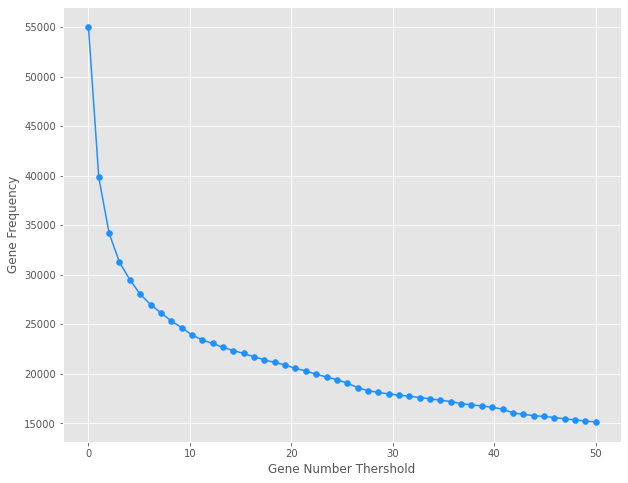

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(thresholds, threshold_data, color='dodgerblue')
plt.plot(thresholds, threshold_data, color='dodgerblue')
plt.xlabel("Gene Number Thershold")
plt.ylabel("Gene Frequency")
plt.savefig("gene_frequency_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:
large_data[row_sums >= 2]


,41004_G02_contigs_pacbio,50884_F01_contigs_pacbio,AIAW00000000,AIBY00000000,AIFN00000000,NC_002655,NC_002695,NC_011353,NC_013008,NC_017906,...,esc_pa2010aa_as,esc_pa2013aa_as,esc_pa2014aa_as,esc_pa2016aa_as,esc_pa2019aa_as,esc_pa2021aa_as,esc_pa2023aa_as,esc_pa2315aa_as,esc_ra2551aa_as,esc_ra2561aa_as
Strain,,,,,,,,,,,,,,,,,,,,,
Lineage,1,1,1,1,1,1,1,1,1,1,...,51,51,51,51,51,51,51,51,51,51
group_5501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_6055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_832_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_1484_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_1503_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
frequency1 = large_data.sum(axis=1)

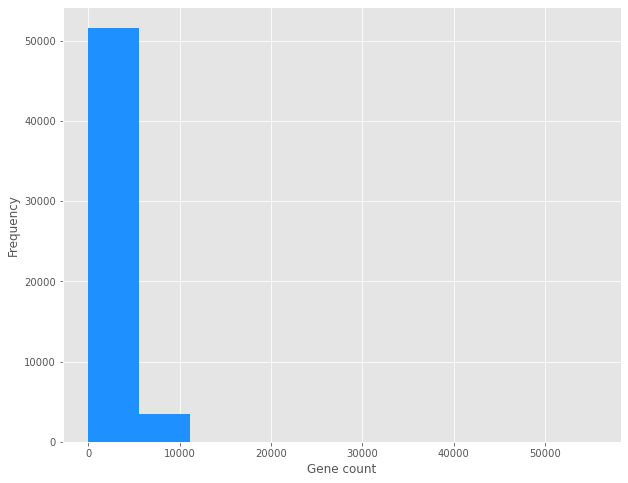

In [9]:
plt.figure(figsize=(10,8))
plt.hist(frequency1, color='dodgerblue')
plt.xlabel('Gene count')
plt.ylabel('Frequency')
plt.savefig("gene_count_2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [10]:
frequency2 = large_data.sum(0)

In [11]:
# plt.figure(figsize=(10,8))
# plt.hist(frequency2, bin=20, color='dodgerblue')
# plt.xlabel('Genome size')
# plt.ylabel('Gene Gamily Frequency')
# plt.savefig("gene_size_2.pdf", format="pdf", bbox_inches="tight")
# plt.show()

In [56]:
row_sums = large_data.sum(axis=1)
filtered_data = large_data[row_sums >= 2]

In [57]:
large_data_t = np.array(filtered_data.transpose())

In [58]:
large_data_t.shape

(7512, 39818)

In [59]:
large_data_t

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [51,  0,  0, ...,  0,  0,  0],
       [51,  0,  0, ...,  0,  0,  0],
       [51,  0,  0, ...,  0,  0,  0]])

In [15]:
large_data_t = large_data_t[:,1:]

In [16]:
large_data_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
large_data_t.shape

(7512, 39817)

# debugging on one sample 

In [33]:
# # Model inputs
# input_dim = large_data_t.shape[1]
# input_dim_old = 9730
# hidden_dim = 512
# latent_dim = 64

# # Loading the model
# pretrained_model = VAE_single(input_dim_old, hidden_dim, latent_dim)
# pretrained_model.load_state_dict(torch.load('saved_single_sample_VAE.pt'))  

# # Freezing the layers
# for param in pretrained_model.parameters():
#    param.requires_grad = False

# # Ensure only the new head parameters are trainable
# pretrained_model.heads = nn.Sequential(nn.Linear(
#                               in_features=latent_dim, 
#                               out_features=input_dim))

In [34]:
# print("\nDetailed New Head Layer Information:")
# for name, layer in pretrained_model.named_children():
#     print(f"Layer Name: {name}")
#     print(layer)


Detailed New Head Layer Information:
Layer Name: encoder
Sequential(
  (0): Linear(in_features=9730, out_features=512, bias=True)
  (1): InstanceNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): InstanceNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): InstanceNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (8): ReLU()
)
Layer Name: mean_layer
Linear(in_features=512, out_features=64, bias=True)
Layer Name: logvar_layer
Linear(in_features=512, out_features=64, bias=True)
Layer Name: decoder
Sequential(
  (0): Linear(in_features=64, out_features=512, bias=True)
  (1): InstanceNorm1d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): InstanceN

In [35]:
# Dataloader for overfitting on one sample (for dubbiging purposes)
input_dim = large_data_t.shape[1]
binary_data = torch.tensor(np.random.randint(0, 2, size=(1, input_dim)), dtype=torch.float32)
single_sample_dataset = TensorDataset(binary_data)
single_sample_loader = DataLoader(single_sample_dataset, batch_size=1, shuffle=True)

In [36]:
print(binary_data)

tensor([[0., 1., 1.,  ..., 1., 0., 0.]])


In [37]:
input_dim

39817

In [38]:
binary_data.shape

torch.Size([1, 39817])

In [42]:
# NO GRADIENT CLIPPING AND SCHEDULER 
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10
input_dim = large_data_t.shape[1]

# Loading the model
model = VAE_single(input_dim, hidden_dim, latent_dim)

# model = VAE_single(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Overfitting one sample to see if the model is broken 
num_epochs = 100

# Collecting data for visualisation 
train_loss_vals1 = []
train_loss_vals2 = []
kl_divergences_no_beta = []
kl_divergences_beta = []

model.train()

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / n_epochs
    epoch_kl_divergence = 0
    epoch_kl_divergence_beta = 0 
    
    for data in single_sample_loader:
        data = data[0].to(torch.float)
        # print(data)
        
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())
        
        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        # Backpropagation
        loss.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method1) = {loss.item()}\nLoss (method2) = {loss2.item()}")
        print("----------------------------------")

    train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    kl_divergences_no_beta.append(epoch_kl_divergence / len(single_sample_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(single_sample_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss.item()}")

Epoch 0
Loss (method1) = 27695.1328125
Loss (method2) = 27653.90234375
----------------------------------
Final Loss after 100 epochs: 84.44257354736328


In [43]:
torch.save(model.state_dict(), "saved_single_sample_VAE_BD.pt")
print("Model saved.")

Model saved.


In [44]:
# Load trained model 
model = VAE_single(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('saved_single_sample_VAE_BD.pt'))  
model.eval()  

# Generate 10 new samples
num_samples = 10 
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)  # Sample from the standard normal distribution (????)
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

print("Generated samples:\n", binary_generated_samples)
print("Generated samples:\n", generated_samples)

Generated samples:
 [[0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 ...
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]
Generated samples:
 [[0.00189166 0.9979272  0.9976666  ... 0.998028   0.00203547 0.0019804 ]
 [0.00188531 0.99790263 0.99767655 ... 0.9979965  0.00201627 0.00198419]
 [0.00191582 0.9979108  0.99766266 ... 0.9980248  0.00204708 0.00198388]
 ...
 [0.00188548 0.9978951  0.9976792  ... 0.99800164 0.00204733 0.00200075]
 [0.00190347 0.9979213  0.9976744  ... 0.99803    0.00201127 0.0019715 ]
 [0.00189538 0.99791676 0.9976459  ... 0.99799526 0.00202601 0.00199846]]


# working with a bigger dataset 

In [47]:
# Model inputs
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0
n_epochs = 10
input_dim = large_data_t.shape[1]

# Loading the model
model = VAE(input_dim, hidden_dim, latent_dim)

In [48]:
# Convert to PyTorch tensor
data_tensor = torch.tensor(large_data_t, dtype=torch.float32)

# Split into train and test sets
train_data, val_data = train_test_split(data_tensor, test_size=0.3, random_state=12345)

batch_size = 32

# TensorDataset
train_dataset = TensorDataset(train_data)
val_dataset = TensorDataset(val_data)

# Dataloader fot a small subset for overfitting (again, for debugging)
small_subset_indices = np.random.choice(len(train_dataset), size=256, replace=False)
small_subset = Subset(train_dataset, small_subset_indices)
small_loader = DataLoader(small_subset, batch_size=batch_size, shuffle=True)

In [49]:
len(small_subset)

256

In [50]:
train_data.shape

torch.Size([5258, 39817])

In [51]:
val_data.shape

torch.Size([2254, 39817])

In [52]:
input_dim

39817

In [54]:
input_dim = large_data_t.shape[1]
hidden_dim = 512
latent_dim = 64
beta_start = 0.1
beta_end = 1.0

# model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

model.train()
num_epochs = 100

# train_loss_vals1 = []
train_loss_vals2 = []
# kl_divergences_no_beta = []
kl_divergences_beta = []

for epoch in range(num_epochs):
    beta = beta_start + (beta_end - beta_start) * epoch / num_epochs
    epoch_kl_divergence_beta = 0
    for data in small_loader:
        data = data[0].to(torch.float)
        # print(data)
    
        optimizer.zero_grad()
        reconstruction, mu, logvar = model(data)
        
        reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, data, reduction='sum')
        # print(reconstruction_loss.item())

        kl_divergence_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        kl_divergence_loss_beta = beta * kl_divergence_loss
        # epoch_kl_divergence += kl_divergence_loss.item()
        epoch_kl_divergence_beta += kl_divergence_loss_beta.item()
        
        # Total loss
        # loss = reconstruction_loss + kl_divergence_loss
        loss2 = reconstruction_loss + kl_divergence_loss_beta
        
        loss2.backward()
        optimizer.step()   

    if epoch % 100 == 0:
        print(f"Epoch {epoch}\nLoss (method 2) = {loss2.item()}")
        print("----------------------------------")

    # train_loss_vals1.append(loss.item())
    train_loss_vals2.append(loss2.item())

    # kl_divergences_no_beta.append(epoch_kl_divergence / len(small_loader.dataset))
    kl_divergences_beta.append(epoch_kl_divergence_beta / len(small_loader.dataset))

print(f"Final Loss after {num_epochs} epochs: {loss2.item()}")

Epoch 0
Loss (method 2) = 68386.6484375
----------------------------------
Final Loss after 100 epochs: 8639.6435546875


In [55]:
torch.save(model.state_dict(), "saved_small_VAE1_BD.pt")
print("Model saved.")

Model saved.


# training of full dataset (train_full_dataset.py script)

In [94]:
data = pd.read_csv(PANGENOME_MATRIX_CSV, index_col=[0], header=[0])

In [95]:
data.shape[0]

25420

In [99]:
data_array_t = np.array(data.transpose())

In [100]:
large_data_t = np.array(large_data.transpose())
large_data_t = large_data_t[:,1:]
input_dim = large_data_t.shape[1]

# Load trained model 
model = VAE(input_dim, hidden_dim, latent_dim)
model.load_state_dict(torch.load('saved_KL_annealing_VAE_BD_100.pt', map_location=device))
model.eval()  

# Generate 10 new samples
num_samples = 100 

sampled_indices = np.random.choice(data_array_t.shape[0], num_samples, replace=False)
z = torch.tensor(data_array_t[sampled_indices, :latent_dim], dtype=torch.float32)  # Sample from your dataset

# No changing weigths
with torch.no_grad():
    generated_samples = model.decode(z).cpu().numpy() 

threshold = 0.5
binary_generated_samples = (generated_samples > threshold).astype(float)

In [101]:
print("Generated probabilities:\n", generated_samples)
print("Generated samples:\n", binary_generated_samples)

Generated probabilities:
 [[6.8764103e-04 1.3949883e-06 5.9492851e-09 ... 1.9775812e-09
  2.1472870e-09 1.1841341e-08]
 [1.5955050e-03 1.7294525e-06 9.2880442e-10 ... 4.0853871e-09
  4.6074513e-09 3.1767865e-08]
 [5.3650362e-04 1.9226061e-06 6.3570398e-09 ... 6.5642904e-09
  7.4152267e-09 4.4697874e-08]
 ...
 [1.9423586e-03 3.6301544e-06 1.0532449e-08 ... 3.3356059e-08
  3.6452548e-08 1.8534720e-07]
 [1.4013881e-04 2.1969536e-06 3.0058314e-10 ... 5.2599778e-09
  5.8936380e-09 2.2140561e-08]
 [6.3005544e-04 5.1748862e-06 8.3360369e-08 ... 2.5359697e-08
  2.7430360e-08 1.1926686e-07]]
Generated samples:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [102]:
np.sum(binary_generated_samples, axis=1)

array([4566., 4572., 4564., 4601., 4629., 4607., 4598., 4568., 4597.,
       4558., 4553., 4615., 4562., 4610., 4594., 4575., 4583., 4562.,
       4593., 4562., 4595., 4548., 4615., 4607., 4625., 4578., 4561.,
       4253., 4551., 4570., 4596., 4603., 4563., 4564., 4596., 4583.,
       4575., 4565., 4607., 4606., 4590., 4558., 4600., 4568., 4563.,
       4569., 4598., 4565., 4561., 4551., 4573., 4565., 4567., 4563.,
       4603., 4585., 4590., 4591., 4589., 4607., 4601., 4585., 4607.,
       4586., 4583., 4598., 4627., 4607., 4618., 4607., 4571., 4607.,
       4603., 4562., 4569., 4564., 4607., 4555., 4563., 4585., 4529.,
       4566., 4626., 4562., 4579., 4580., 4593., 4585., 4613., 4577.,
       4570., 4573., 4625., 4529., 4619., 4564., 4603., 4608., 4572.,
       4567.])

In [103]:
len(np.sum(binary_generated_samples, axis=1))

100